(500000, 2)
(513, 2500)
(2500,)


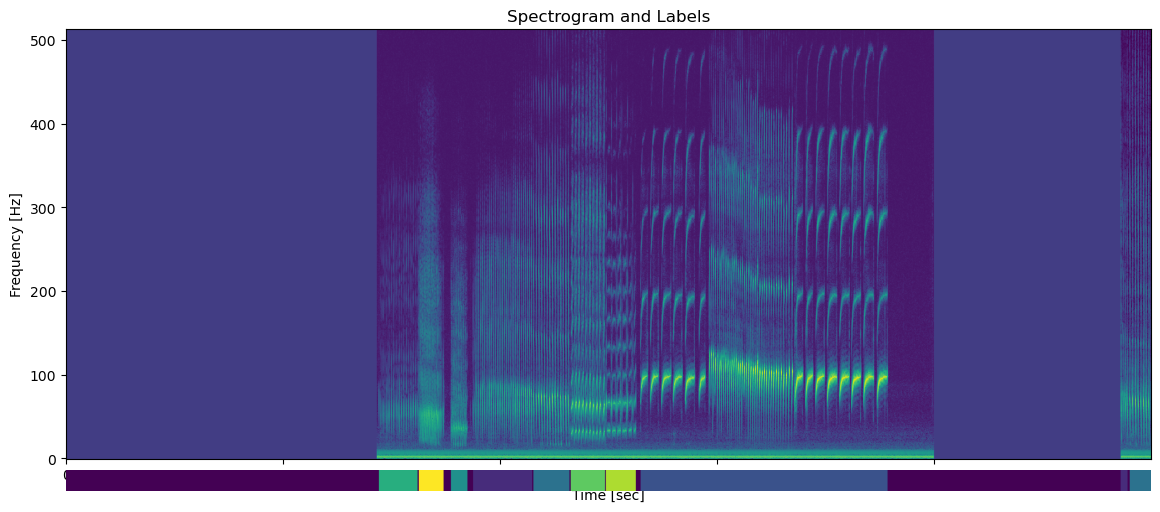

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["s"]  # Spectrogram data
    labels = data["ground_truth_labels"]  # Integer labels per timepoint
    embedding = data["embedding_outputs"]

    print(embedding.shape)

    # Only consider the first 1000 timepoints for plotting
    spec_slice = spec[10000:12500, :]  # Take all frequency bins, but only the first 1000 timepoints
    labels_slice = labels[10000:12500]  # Take the first 1000 labels
    spec_slice = spec_slice.T

    print(spec_slice.shape)
    print(labels_slice.shape)

    # Create a colormap for the labels
    unique_labels = np.unique(labels_slice)
    num_labels = len(unique_labels)
    cmap = plt.get_cmap('viridis', num_labels)
    colors = cmap(np.linspace(0, 1, num_labels))

    # Set up the figure and gridspec
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[20, 1], hspace=0.05)

    # Create a spectrogram axis
    ax0 = fig.add_subplot(gs[0])
    im = ax0.imshow(spec_slice, aspect='auto', origin='lower')
    ax0.set_xlabel('Time [sec]')
    ax0.set_ylabel('Frequency [Hz]')
    ax0.set_title('Spectrogram and Labels')

    # Create an axis for the labels color bar
    ax1 = fig.add_subplot(gs[1])
    label_colors = [colors[np.where(unique_labels == label)[0][0]] for label in labels_slice]
    label_colors = np.array(label_colors).reshape(1, -1, 4)
    ax1.imshow(label_colors, aspect='auto', origin='lower')

    # Remove y-ticks, y-label and x-ticks from the labels color bar
    ax1.axis('off')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_llb3_labels_attached_attention-1.npz"
plot_spectrogram_with_labels(file_path)

(500000, 2)
(513, 7000)
(7000, 2)


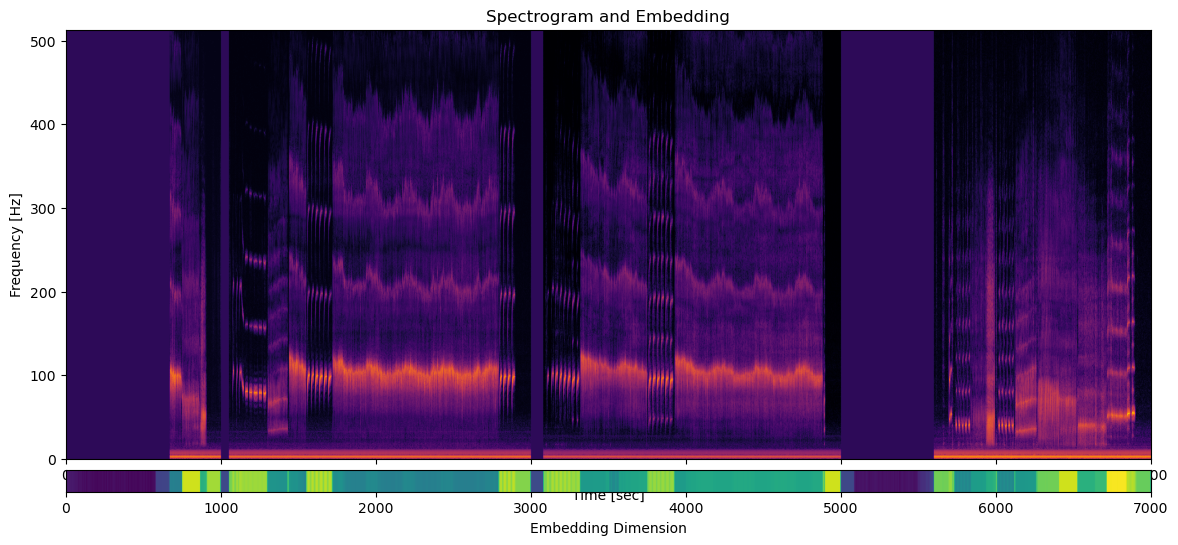

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_embedding(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["s"]  # Spectrogram data
    labels = data["hdbscan_labels"]  # Integer labels per timepoint
    embedding = data["embedding_outputs"]
    print(embedding.shape)

    # Only consider a specific slice for plotting
    spec_slice = spec[0:7000, :].T  # Transpose to make frequency the first dimension
    embedding_slice = embedding[0:7000, :]  # Take the corresponding embedding coordinates
    print(spec_slice.shape)
    print(embedding_slice.shape)

    # Normalize the spectrogram values to the range [0, 1]
    spec_slice_normalized = (spec_slice - np.min(spec_slice)) / (np.max(spec_slice) - np.min(spec_slice))

    # Normalize the embedding dimensions between 0 and 1
    embedding_slice_normalized = (embedding_slice - embedding_slice.min(axis=0)) / (embedding_slice.max(axis=0) - embedding_slice.min(axis=0))

    # Set up the figure and gridspec
    fig, axs = plt.subplots(2, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [20, 1], 'hspace': 0.05})

    # Plot the spectrogram
    im = axs[0].imshow(spec_slice_normalized, aspect='auto', origin='lower', cmap='inferno', extent=[0, spec_slice_normalized.shape[1], 0, spec_slice_normalized.shape[0]])
    axs[0].set_xlabel('Time [sec]')
    axs[0].set_ylabel('Frequency [Hz]')
    axs[0].set_title('Spectrogram and Embedding')

    # Plot the embedding gradient colorbar as a mix of two colors across one dimension
    embedding_gradient = np.mean(embedding_slice_normalized, axis=1)
    embedding_gradient = np.tile(embedding_gradient, (2, 1))  # Duplicate to match the height of the colorbar
    axs[1].imshow(embedding_gradient, aspect='auto', origin='lower', extent=[0, spec_slice_normalized.shape[1], 0, 1])
    axs[1].set_yticks([])
    axs[1].set_xlabel('Embedding Dimension')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_llb3_labels_attached_attention-1.npz"
plot_spectrogram_with_embedding(file_path)


In [12]:
import shutil
import os

src = "/media/george-vengrovski/disk1/multispecies_data_set_train"
dst = "/media/george-vengrovski/disk1/multispecies_data_set_test"

for filename in os.listdir(src):
    if 'llb' in filename:
        try:
            shutil.move(os.path.join(src, filename), dst)
            print(f"Moved {filename} successfully.")
        except Exception as e:
            print(f"Failed to move {filename}. Error: {e}")


In [ ]:
src = "/media/george-vengrovski/disk1/multispecies_data_set_train"



In [25]:
dir = "/media/george-vengrovski/disk1/multispecies_data_set_test"
dir2 = "/media/george-vengrovski/disk1/bf_test_specs"

import random

# List all files in the directory
files = os.listdir(dir)

# Randomly select 1000 files if there are more than 1000 files in the directory
selected_files = random.sample(files, min(1000, len(files)))

for file in selected_files:
    print(file)

# # Print the selected files
# for file in files:
#     target_numbers = ["Y12"]
#     if any(target in file for target in target_numbers):
#         print(f"{file} is in the test set.")


# import shutil

# Define the source and destination directories
source_dir = dir
destination_dir = dir2

# Iterate through all files in the source directory
for file in files:
    # Check if the target string 'dev' is in the file name
    if "bird2" in file:
        # Construct the full path of the source and destination files
        src_file = os.path.join(source_dir, file)
        dst_file = os.path.join(destination_dir, file)
        
        # Copy the file from the source to the destination
        shutil.copy(src_file, dst_file)
    
        print(f"Copied {file} to {destination_dir}")

Y15_44965.30403402_2_8_8_26_43_0.npz
Box2Ephys_2023-06-17_3_0025.merged_0_part2.npz
Y9_44837.40329596_10_3_11_12_9_0.npz
Box1Ephys_2023-06-20_1_0061.merged_0_part2.npz
USA5283_45349.37143332_2_27_10_19_3_0.npz
Y9_44886.32459871_11_21_9_0_59_0.npz
USA5336_45304.45393547_1_13_12_36_33_0.npz
Y9_44882.32510879_11_17_9_1_50_0.npz
llb3_0364_2018_04_24_17_12_22_0.npz
USA5347_45230.25858015_10_31_7_10_58_0.npz
Y17_44967.26646365_2_10_7_24_6_0.npz
Y17_44957.38464091_1_31_10_41_4_0.npz
Y16_44941.51878736_1_15_14_24_38_0.npz
Box2Ephys_2023-06-21_1_0052.merged_0_part1.npz
llb11_00880_2018_05_07_09_29_37_0.npz
Y17_44969.25584627_2_12_7_6_24_0.npz
USA5288_45360.50743871_3_9_14_5_43_0.npz
USA5325_45230.27787009_10_31_7_43_7_0.npz
USA5271_45358.25805866_3_7_7_10_5_0.npz
Y9_44832.30304216_9_28_8_25_4_0.npz
Y8_44860.55170187_10_26_15_19_30_0.npz
Box2Ephys_2023-06-27_1_0033.merged_0.npz
USA5325_45214.39549130_10_15_10_59_9_0.npz
Y17_44980.49947627_2_23_13_52_27_0.npz
Y11_44856.44339058_10_22_12_18_59_0.n

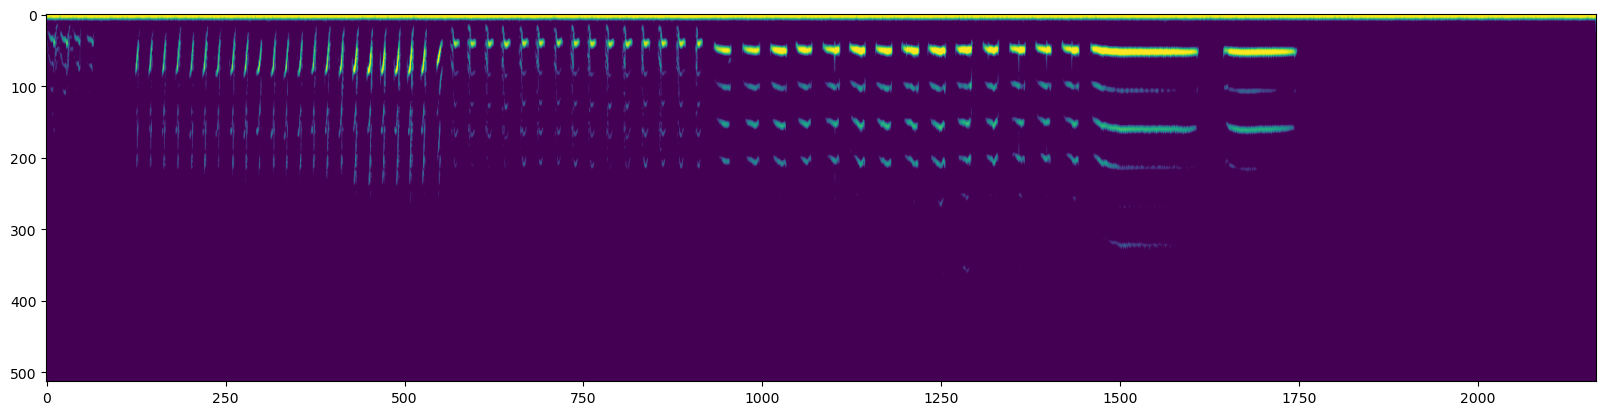

In [9]:
f = "/media/george-vengrovski/disk1/yarden_OG_llb3/llb3_0064_2018_04_23_17_30_36.wav.npz"

import numpy as np
import matplotlib.pyplot as plt

# Load the npz file
data = np.load(f)

spec = data["s"]

plt.figure(figsize=(20, 16))

plt.imshow(spec)
plt.show()
